# **Ch02.12. 실전-한국 부동산 데이터 시각화 경진대회**


---

*   날짜:2022-05-03
*   이름:안창덕

[한국 부동산 데이터 시각화 경진대회](https://dacon.io/competitions/official/235724/overview/description)

In [275]:
import os
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from pandas.core.frame import DataFrame

In [276]:
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [288]:
df = pd.read_csv('/content/drive/MyDrive/235724_한국 부동산 데이터 시각화 경진대회_data/미분양주택현황.csv')
df

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,17130.0,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


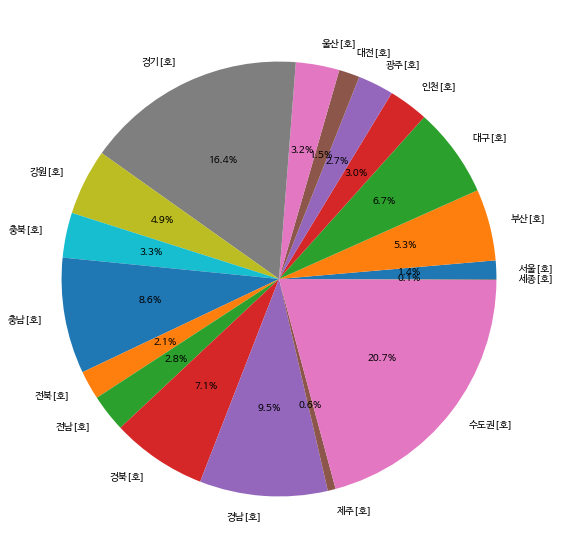

In [289]:
df_sum = pd.DataFrame(df.sum())
df_sum = df_sum.drop(['전국[호]', 'Unnamed: 0'], axis=0)

plt.figure(figsize=(12,10))
plt.pie(df_sum, labels=df_sum.index.values, autopct='%.1f%%')
plt.show()

**2007년부터 2021년 2월까지 전국 미분양 비율**

1위 : 수도권 20.7%

2위 : 경기도 16.4%

3위 : 경상남도 9.5%

4위 : 경상북도 7.1%

In [281]:
df

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,17130.0,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0


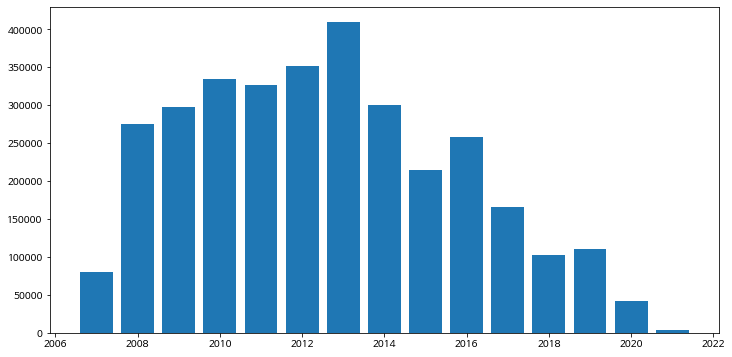

In [290]:
df = df.rename({"Unnamed: 0":"연도"}, axis = 1)

df['연도'] = df['연도'].astype('datetime64')

sudo = df.groupby(df['연도'].dt.year)['수도권[호]'].sum()
sudo_year = pd.DataFrame(sudo)

plt.bar(sudo_year.index.values,sudo_year.iloc[:,0])
plt.show()

전국 미분양 1위 지역인 수도권은 2013년도에 미분양 40만건 이상으로 가장 높았다.

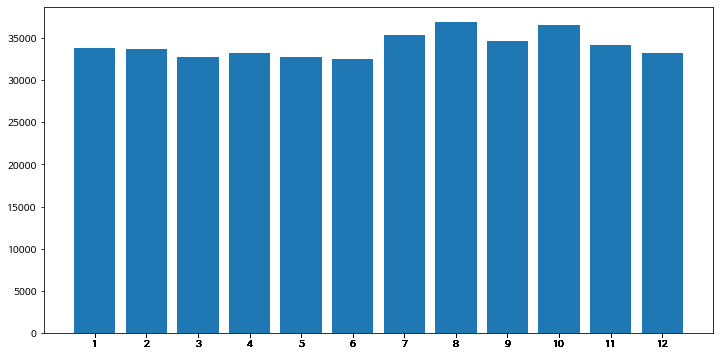

In [291]:
df_13 = df[df['연도'].dt.year==2013]
df_13 = pd.DataFrame(df_13['수도권[호]'])

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], df_13.iloc[:,0])
plt.xticks(df['연도'].dt.month)
plt.show()

2013년도 수도권 지역의 미분양 월별 건수는 8월이 가장 많았다.

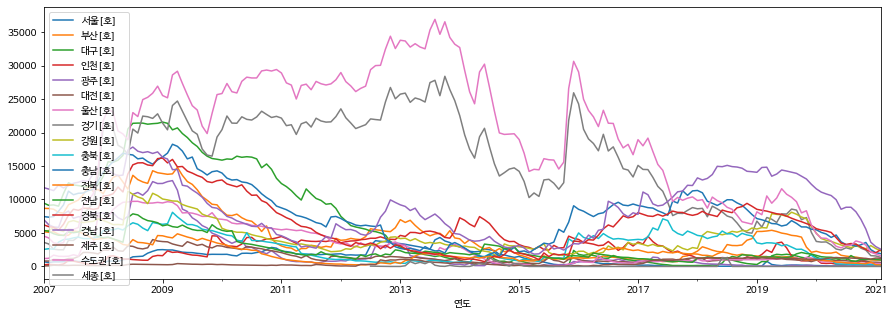

In [319]:
df_line = df.drop(['전국[호]'],  axis=1)

df_line.plot(kind='line', x='연도',figsize=(15, 5))
plt.show()

**연도별 전국 미분양 추이**

In [357]:
house_trans = pd.read_csv('/content/drive/MyDrive/235724_한국 부동산 데이터 시각화 경진대회_data/주택매매가격지수(KB).csv')
house_trans.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588


In [356]:
house_lease = pd.read_csv('/content/drive/MyDrive/235724_한국 부동산 데이터 시각화 경진대회_data/주택전세가격지수(KB).csv')
house_lease.head()

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040


In [350]:
house_trans = pd.read_csv('/content/drive/MyDrive/235724_한국 부동산 데이터 시각화 경진대회_data/주택매매가격지수(KB).csv')
house_trans = house_trans.rename({"Unnamed: 0":"연도"}, axis = 1)
house_trans.set_index("연도", inplace=True)
house_trans = house_trans.iloc[:,1:4]
house_trans.columns = ["단독주택(매매)","연립주택(매매)","아파트(매매)"]

In [351]:
house_lease = pd.read_csv('/content/drive/MyDrive/235724_한국 부동산 데이터 시각화 경진대회_data/주택전세가격지수(KB).csv')
house_lease = house_lease.rename({"Unnamed: 0":"연도"}, axis = 1)
house_lease.set_index("연도", inplace=True)
house_lease = house_lease.iloc[:,1:4]
house_lease.columns = ["단독주택(전세)","연립주택(전세)","아파트(전세)"]

In [353]:
house_price = pd.concat([house_trans,house_lease],axis=1)

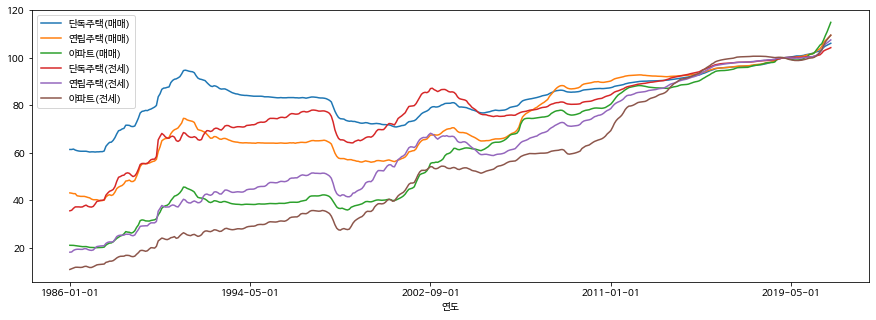

In [355]:
house_price.plot(kind='line', figsize=(15, 5))
plt.show()